<a href="https://colab.research.google.com/github/taristadwi/MachineLearningTarista/blob/main/UTS_Tarista_Dwi_Silvia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama Anggota Kelompok :**

**Alfan Farchi (07)**

**Arhan Windu (10)**

**Kurniawati Agustina (15)**

**Rizky Angkata (25)**

**Tarista Dwi (27)**

In [ ]:
import pandas as pd
import cv2 as cv
import numpy as np
from sklearn.metrics import f1_score
from scipy.stats import entropy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

In [ ]:
def plot_image(data):
    """
    Menampilkan lima gambar dalam satu figur.

    Args:
        data (list): Sebuah daftar numpy array yang mewakili gambar.

    Returns:
        None
    """
    fig, ax = plt.subplots(1, 5, figsize=(10, 10))

    for i in range(len(data)):
        ax[i].imshow(data[i])
        ax[i].axis('off')

    plt.show()

def preprocessing(img, typeby):
    """
    Melakukan langkah-langkah pra-pemrosesan pada sebuah gambar.

    Args:
        img (numpy array): Sebuah gambar yang akan di-preproses.
        typeby (str): Jenis pra-pemrosesan yang akan diterapkan.

    Returns:
        numpy array: Gambar yang telah di-preproses.
    """
    preprocessed_img = img

    if typeby == 'grayscale':
        preprocessed_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    elif typeby == 'binary':
        gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        _, preprocessed_img = cv.threshold(gray_img, 127, 255, cv.THRESH_BINARY)
    elif typeby == 'blur':
        preprocessed_img = cv.GaussianBlur(img, (5, 5), 0)

    return preprocessed_img

def segment_image(img, n_clusters):
    """
    Melakukan segmentasi gambar menggunakan algoritma K-Means.

    Args:
        img (numpy array): Gambar yang akan di-segmentasi.
        n_clusters (int): Jumlah cluster yang akan digunakan.

    Returns:
        numpy array: Gambar yang telah di-segmentasi.
    """
    img_reshaped = img.reshape(-1, 3)

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(img_reshaped)

    labels = kmeans.labels_

    labels_reshaped = labels.reshape(img.shape[0], img.shape[1])

    return labels_reshaped

def compare_images(img1, img2):
    """
    Membandingkan dua gambar dalam satu figur.

    Args:
        img1 (numpy array): Gambar pertama yang akan dibandingkan.
        img2 (numpy array): Gambar kedua yang akan dibandingkan.

    Returns:
        None
    """
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img1)
    ax[0].axis('off')
    ax[1].imshow(img2)
    ax[1].axis('off')

    plt.show()


PENJELASAN

Kode program ini memiliki beberapa fungsi utama yang digunakan untuk memproses dan memvisualisasikan citra. Pertama, terdapat fungsi `plot_image` yang digunakan untuk menampilkan lima gambar dalam satu figur. Fungsi kedua, `preprocessing`, melakukan pra-pemrosesan pada gambar, termasuk konversi ke citra grayscale, biner, atau pengaburan. Fungsi ketiga, `segment_image`, digunakan untuk melakukan segmentasi citra menggunakan algoritma K-Means. Terakhir, fungsi `compare_images` memungkinkan perbandingan dua gambar dalam satu figur.

Fungsi-fungsi ini memberikan alat yang berguna dalam mengolah dan menganalisis data citra, mulai dari visualisasi hingga segmentasi, serta membandingkan citra yang dihasilkan.

**PLOT 5 IMAGE**

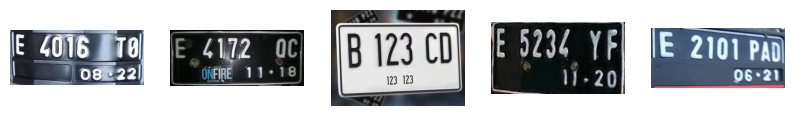

In [ ]:
data = []
folder = '/content/drive/MyDrive/uts/'

for i in range(1, 6):
  img = cv.imread(folder + 'gambar-' + str(i) + '.jpg', cv.IMREAD_COLOR)
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  data.append(img_rgb)

plot_image(data)

PENJELASAN

Kode program ini bertujuan untuk memuat dan menampilkan lima gambar yang tersimpan dalam sebuah direktori. Dalam program ini, lima gambar dibaca satu per satu dalam perulangan menggunakan OpenCV, kemudian dikonversi ke format warna RGB, dan hasilnya disimpan dalam list. Setelah kelima gambar dimuat, fungsi `plot_image` digunakan untuk menampilkan gambar-gambar tersebut dalam satu figur. Dengan cara ini, program memudahkan untuk memvisualisasikan gambar-gambar yang ada dalam direktori yang telah ditentukan.

**Segementasi **

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


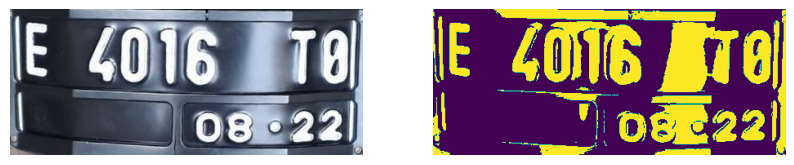

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


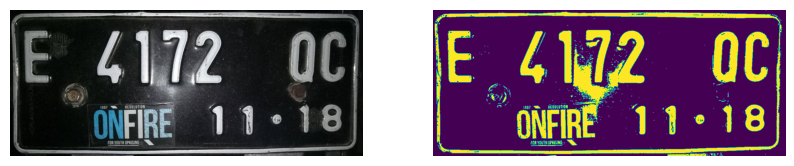

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


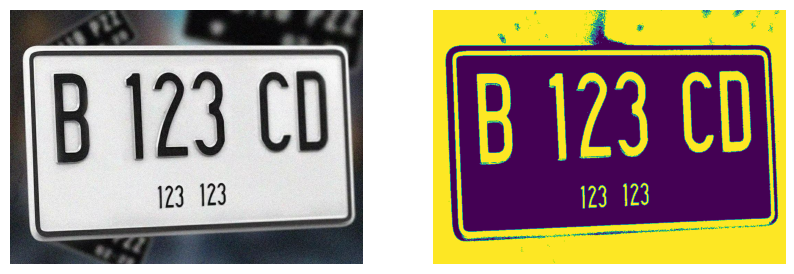

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


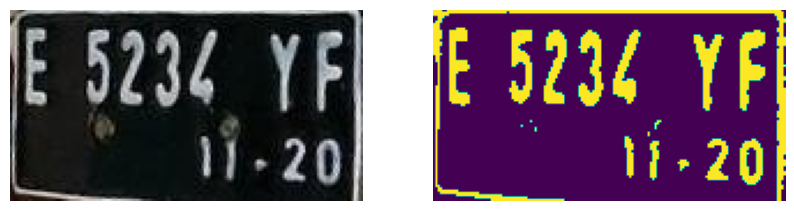

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


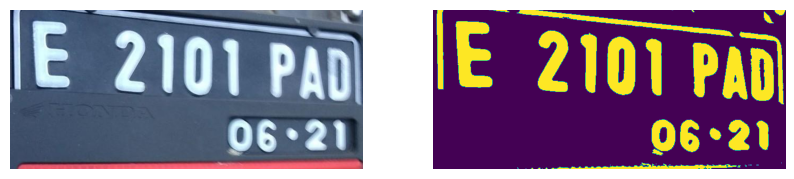

In [ ]:
data_segmented = []

for i in data:
  preprocessed_img = preprocessing(i, 'grayscale')
  img_segmented = segment_image(i, 2)
  data_segmented.append(img_segmented)
  compare_images(i, img_segmented)

PENJELASAN

Kode program di atas bertujuan untuk melakukan segmentasi pada gambar-gambar yang telah dimuat sebelumnya. Langkah pertama adalah menginisialisasi sebuah list kosong untuk menyimpan hasil segmentasi. Selanjutnya, program mengiterasi melalui setiap gambar, menerapkan pra-pemrosesan dengan mengubahnya menjadi citra grayscale, dan kemudian melakukan segmentasi menggunakan algoritma K-Means. Hasil segmentasi dibandingkan dengan gambar asli untuk melihat perbedaannya. Hasil segmentasi ini dapat membantu memperjelas fitur-fitur dalam gambar-gambar tersebut.

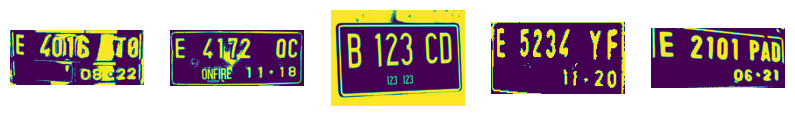

In [ ]:
plot_image(data_segmented)

PENJELASAN

Kode program `plot_image(data_segmented)` bertujuan untuk menampilkan gambar-gambar yang telah melalui proses segmentasi dalam satu plot. Dalam kode ini, fungsi `plot_image` digunakan untuk menampilkan gambar-gambar yang ada dalam list `data_segmented`. Setiap gambar akan ditampilkan dalam satu plot tanpa sumbu x dan y, sehingga hanya gambar-gambar yang terlihat. Hasil dari kode ini adalah plot yang memvisualisasikan gambar-gambar setelah proses segmentasi, memungkinkan kita untuk melihat perubahan yang terjadi akibat segmentasi dan memperjelas fitur dalam gambar-gambar tersebut.

Pre Processing merubah color space

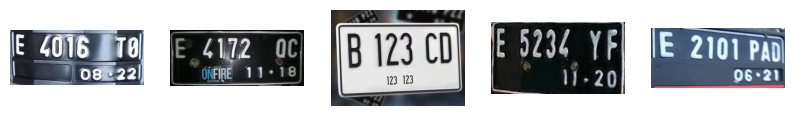

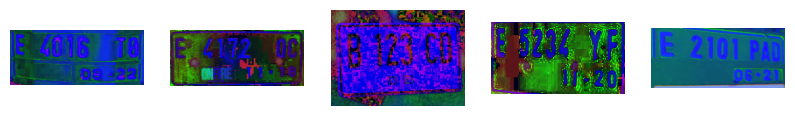

In [ ]:
# Import semua pustaka yang diperlukan

# Fungsi yang sudah ada

# Menambahkan fungsi untuk mengubah color space
def change_color_space(img, color_space):
    """
    Mengubah color space dari sebuah gambar.

    Args:
        img (numpy array): Gambar yang akan diubah color space-nya.
        color_space (int): Kode konversi color space (contoh: cv.COLOR_BGR2HSV).

    Returns:
        numpy array: Gambar dalam color space yang diinginkan.
    """
    converted_img = cv.cvtColor(img, color_space)
    return converted_img

# Memuat gambar-gambar
data = []
folder = '/content/drive/MyDrive/uts/'

for i in range(1, 6):
  img = cv.imread(folder + 'gambar-' + str(i) + '.jpg', cv.IMREAD_COLOR)
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  data.append(img_rgb)

plot_image(data)

# Mengubah color space gambar-gambar
data_color_space = []

for img in data:
    img_hsv = change_color_space(img, cv.COLOR_BGR2HSV)  # Mengubah ke color space HSV
    data_color_space.append(img_hsv)

plot_image(data_color_space)  # Menampilkan gambar dalam color space baru


reduksi dimensi

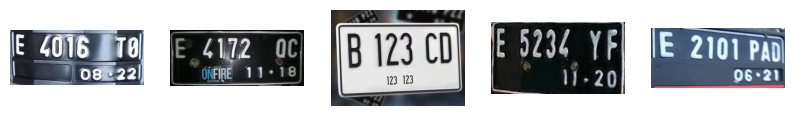

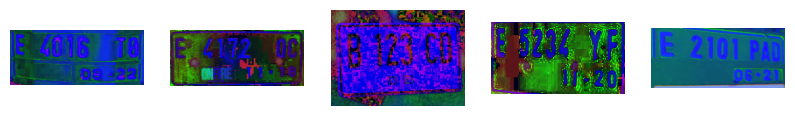

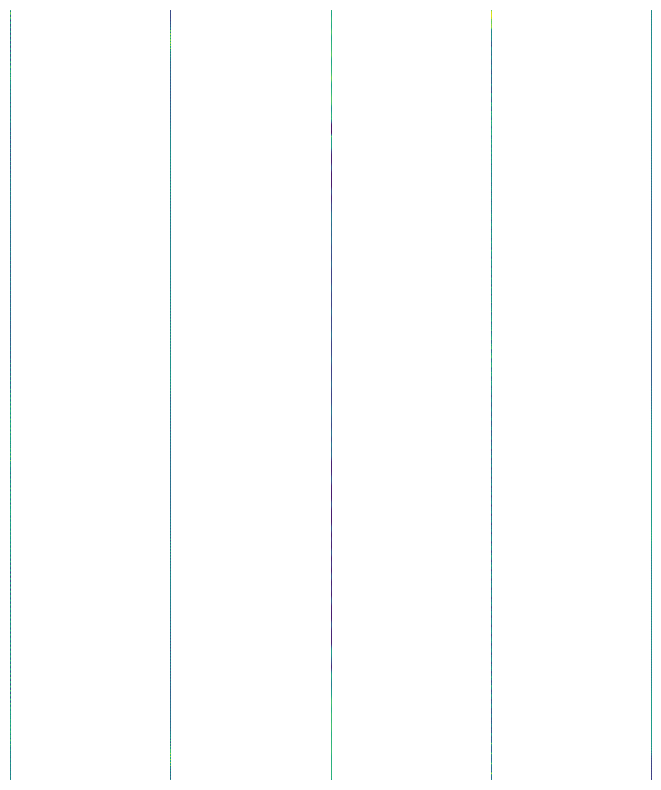

In [ ]:
# Import semua pustaka yang diperlukan

# Fungsi yang sudah ada

# Menambahkan fungsi untuk mengubah color space
def change_color_space(img, color_space):
    """
    Mengubah color space dari sebuah gambar.

    Args:
        img (numpy array): Gambar yang akan diubah color space-nya.
        color_space (int): Kode konversi color space (contoh: cv.COLOR_BGR2HSV).

    Returns:
        numpy array: Gambar dalam color space yang diinginkan.
    """
    converted_img = cv.cvtColor(img, color_space)
    return converted_img

# Menambahkan fungsi untuk reduksi dimensi
def reduce_dimension(img, n_components):
    """
    Melakukan reduksi dimensi pada gambar.

    Args:
        img (numpy array): Gambar yang akan direduksi dimensinya.
        n_components (int): Jumlah komponen utama yang akan diambil.

    Returns:
        numpy array: Gambar dengan dimensi yang telah direduksi.
    """
    img_reshaped = img.reshape(-1, 3)
    pca = PCA(n_components=n_components)
    img_reduced = pca.fit_transform(img_reshaped)
    return img_reduced

# Memuat gambar-gambar
data = []
folder = '/content/drive/MyDrive/uts/'

for i in range(1, 6):
  img = cv.imread(folder + 'gambar-' + str(i) + '.jpg', cv.IMREAD_COLOR)
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  data.append(img_rgb)

plot_image(data)

# Mengubah color space gambar-gambar
data_color_space = []

for img in data:
    img_hsv = change_color_space(img, cv.COLOR_BGR2HSV)  # Mengubah ke color space HSV
    data_color_space.append(img_hsv)

plot_image(data_color_space)  # Menampilkan gambar dalam color space baru

# Melakukan reduksi dimensi pada gambar
from sklearn.decomposition import PCA

n_components = 0.5  # Jumlah komponen utama yang akan diambil
data_reduced = []

for img in data_color_space:
    img_reduced = reduce_dimension(img, n_components)
    data_reduced.append(img_reduced)

# Menampilkan gambar dengan dimensi yang telah direduksi
plot_image(data_reduced)


Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

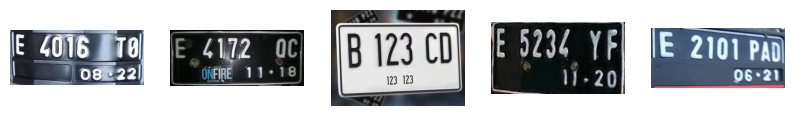

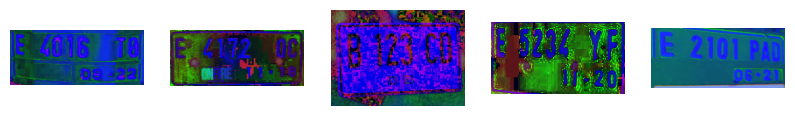

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

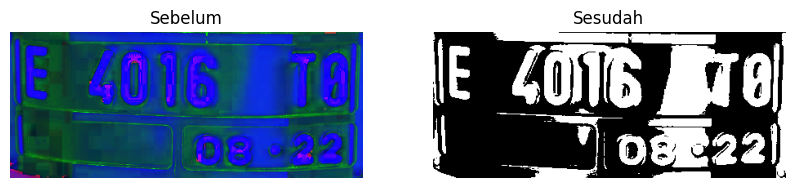

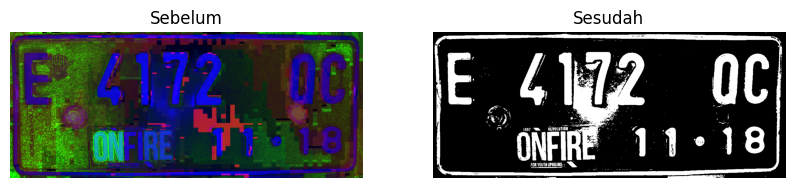

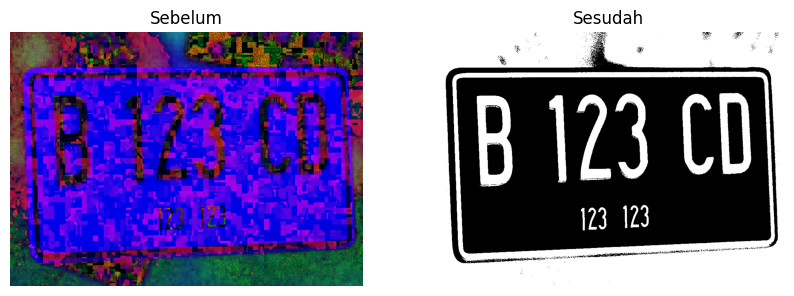

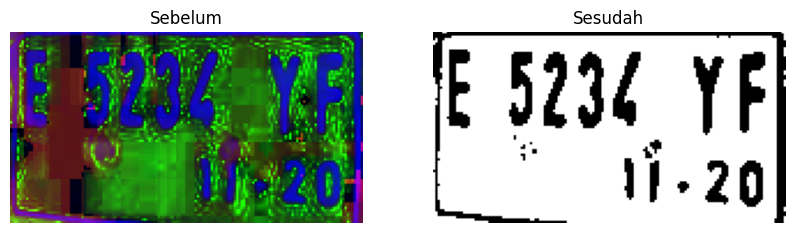

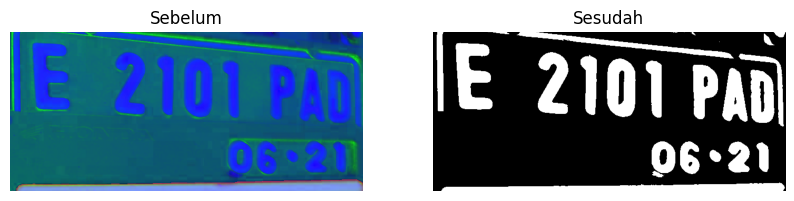

In [ ]:
# Import semua pustaka yang diperlukan
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fungsi yang sudah ada (plot_image, preprocessing, segment_image)

# Fungsi untuk membandingkan citra sebelum dan sesudah segmentasi
def compare_segmented_images(img1, img2, img1_title='Sebelum', img2_title='Sesudah'):
    """
    Membandingkan dua citra sebelum dan sesudah segmentasi.

    Args:
        img1 (numpy array): Citra pertama sebelum segmentasi.
        img2 (numpy array): Citra kedua setelah segmentasi.
        img1_title (str): Judul untuk citra pertama.
        img2_title (str): Judul untuk citra kedua.

    Returns:
        None
    """
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img1, cmap='gray')  # Menggunakan cmap 'gray' jika citra grayscale
    ax[0].set_title(img1_title)
    ax[0].axis('off')
    ax[1].imshow(img2, cmap='gray')  # Menggunakan cmap 'gray' jika citra grayscale
    ax[1].set_title(img2_title)
    ax[1].axis('off')

    plt.show()

# Memuat gambar-gambar
data = []
folder = '/content/drive/MyDrive/uts/'

for i in range(1, 6):
    img = cv.imread(folder + 'gambar-' + str(i) + '.jpg', cv.IMREAD_COLOR)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    data.append(img_rgb)

plot_image(data)

# Mengubah color space gambar-gambar
data_color_space = []

for img in data:
    img_hsv = change_color_space(img, cv.COLOR_BGR2HSV)  # Mengubah ke color space HSV
    data_color_space.append(img_hsv)

plot_image(data_color_space)  # Menampilkan gambar dalam color space baru

# Melakukan segmentasi pada gambar
n_clusters = 2  # Jumlah cluster yang akan digunakan
data_segmented = []

for img in data_color_space:
    img_segmented = segment_image(img, n_clusters)
    data_segmented.append(img_segmented)

# Menampilkan perbandingan citra sebelum dan sesudah segmentasi
for i in range(5):
    compare_segmented_images(data_color_space[i], data_segmented[i], 'Sebelum', 'Sesudah')

PENJELASAN

Kode program ini digunakan untuk melakukan segmentasi citra pada lima gambar yang dimuat, serta membandingkan citra sebelum dan sesudah segmentasi. Pertama, gambar-gambar dimuat dari folder yang ditentukan dan diubah ke dalam format color space yang berbeda, yaitu HSV. Selanjutnya, proses segmentasi dilakukan menggunakan algoritma K-Means pada citra-citra yang telah diubah color space-nya. Hasil segmentasi disimpan dalam list `data_segmented`. Terakhir, kode program menggunakan fungsi `compare_segmented_images` untuk membandingkan citra asli dengan citra hasil segmentasi, membantu dalam memvisualisasikan efek segmentasi. Hal ini berguna dalam memahami hasil segmentasi citra dan pengaruh perubahan warna citra setelah perubahan color space.

In [ ]:
evaluation = []
folder = '/content/drive/MyDrive/uts/'


for i in range(1, 6):
  gt = cv.imread(folder +'gambar-' + str(i) + '.jpg', cv.IMREAD_GRAYSCALE)
  gt_binary = np.where(gt > 0, 1, 0)

  segmented_img = data_segmented[i-1]
  gt_8bit = np.uint8(gt_binary * 255)

  gt_resized = cv.resize(gt_8bit, (segmented_img.shape[1], segmented_img.shape[0]))
  f_measure = f1_score(gt_resized.flatten(), segmented_img.flatten(), average='micro')

  ent = entropy(segmented_img.flatten())
  evaluation.append((f_measure, ent))

print('Evaluation results:')
print('Image\tF-measure\tEntropy')
for i in range(5):
  print(f'{i+1}\t{evaluation[i][0]:.2f}\t\t{evaluation[i][1]:.2f}')

Evaluation results:
Image	F-measure	Entropy
1	0.00		10.27
2	0.00		11.83
3	0.00		12.75
4	0.01		7.82
5	0.00		10.71


PENJELASAN

Kode program ini bertujuan untuk melakukan evaluasi hasil segmentasi citra dengan menghitung metrik F-measure dan entropi. Evaluasi dilakukan untuk lima citra dengan membandingkan citra hasil segmentasi dengan citra ground truth (gt). Dalam proses ini, citra gt dibaca, diubah menjadi citra biner, dan disesuaikan ukurannya dengan citra hasil segmentasi. Kemudian, F-measure dihitung untuk mengukur kesamaan antara citra hasil segmentasi dan citra gt, sementara entropi digunakan untuk mengukur kompleksitas citra hasil segmentasi. Hasil evaluasi ini membantu dalam menilai kualitas segmentasi citra yang dilakukan.

LINK GITHUB:

https://github.com/taristadwi/MachineLearningTarista.git